In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
import scipy.ndimage
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
%matplotlib inline

Using TensorFlow backend.


In [2]:
DATADIR = '/tmp/ml_data'

In [3]:
img = scipy.ndimage.imread('/tmp/ml_data/train/circ/000.jpg')
img.shape

(150, 150)

In [4]:
def read_data(root_dir, classes, ext='.jpg'):
    file_glob = '*' + ext
    n_images = len(glob.glob(os.path.join(root_dir, '*', file_glob)))
    class_counts = [len(glob.glob(os.path.join(root_dir, c, file_glob))) for c in classes]
    example_img = glob.glob(os.path.join(root_dir, classes[0], file_glob))[0]
    img_dims = scipy.ndimage.imread(example_img).shape
    X = np.ndarray((n_images, img_dims[0], img_dims[1], 1))
    Y = np.ndarray(n_images)
    counter = 0
    for ic, c in enumerate(classes):
        n_class = class_counts[ic]
        path_patt = os.path.join(root_dir, c, '*' + ext)
        for ip, p in enumerate(glob.glob(path_patt)):
            X[counter, :, :, 0] = scipy.ndimage.imread(p)
            Y[counter] = ic
            counter += 1
    return X, Y

In [5]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(150, 150, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [6]:
X_train, Y_train = read_data('/tmp/ml_data/train', ('circ', 'tri'))
model.fit(X_train, Y_train, nb_epoch=10, batch_size=64)

Epoch 1/10
2000/2000 [==============================] - 48s - loss: 0.7661 - acc: 0.6350    
Epoch 2/10
2000/2000 [==============================] - 49s - loss: 0.4947 - acc: 0.7485    
Epoch 3/10
2000/2000 [==============================] - 48s - loss: 0.3842 - acc: 0.8195    
Epoch 4/10
2000/2000 [==============================] - 48s - loss: 0.3207 - acc: 0.8465    
Epoch 5/10
2000/2000 [==============================] - 48s - loss: 0.2373 - acc: 0.8960    
Epoch 6/10
2000/2000 [==============================] - 48s - loss: 0.1884 - acc: 0.9170    
Epoch 7/10
2000/2000 [==============================] - 48s - loss: 0.1700 - acc: 0.9215    
Epoch 8/10
2000/2000 [==============================] - 48s - loss: 0.1426 - acc: 0.9445    
Epoch 9/10
2000/2000 [==============================] - 47s - loss: 0.1517 - acc: 0.9510    
Epoch 10/10
2000/2000 [==============================] - 48s - loss: 0.1324 - acc: 0.9495    


In [7]:
X_test, y_test = read_data('/tmp/ml_data/test', ('circ', 'tri'))

In [8]:
score = model.evaluate(X_test, y_test, batch_size=16)
score

200/200 [==============================] - 1s     


[0.080924158785492181, 0.97499999999999998]

In [9]:
proba = model.predict_proba(X_test)

200/200 [==============================] - 1s     


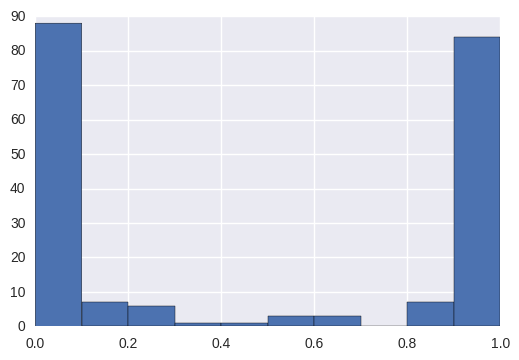

In [10]:
a = plt.hist(proba)

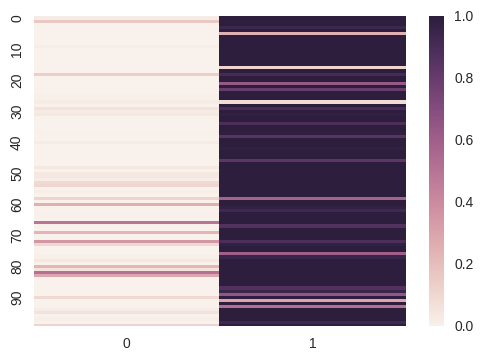

In [11]:
sns.heatmap(proba.reshape((100, 2), order='F'), yticklabels=10)

82

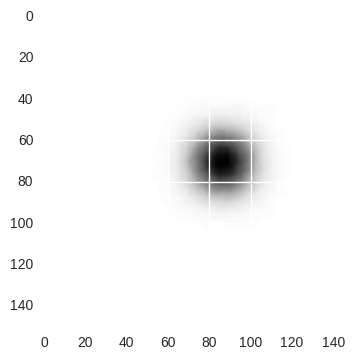

In [12]:
i_worst = np.argmax(proba[0:100])
plt.imshow(X_test[i_worst, :, :, 0])
i_worst

27

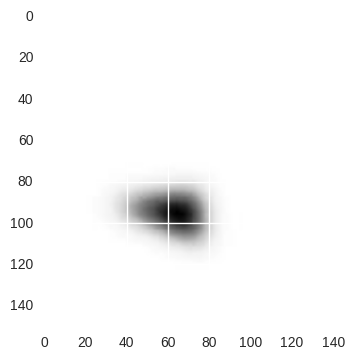

In [13]:
i_worst = np.argmin(proba[100:])
plt.imshow(X_test[100 + i_worst, :, :, 0])
i_worst

In [14]:
batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 10 # we iterate 10 times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
hidden_size = 512 # the FC layer will have 512 neurons

model2 = Sequential()
model2.add(Convolution2D(conv_depth_1, kernel_size, kernel_size, activation='relu', border_mode='same', input_shape=(150, 150, 1)))
model2.add(Convolution2D(conv_depth_1, kernel_size, kernel_size, activation='relu', border_mode='same'))
model2.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model2.add(Dropout(drop_prob_1))
model2.add(Convolution2D(conv_depth_2, kernel_size, kernel_size, activation='relu', border_mode='same'))
model2.add(Convolution2D(conv_depth_2, kernel_size, kernel_size, activation='relu', border_mode='same'))
model2.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model2.add(Dropout(drop_prob_1))
model2.add(Flatten())
model2.add(Dense(hidden_size, activation='relu'))
model2.add(Dropout(drop_prob_2))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

In [16]:
model2.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=num_epochs)

Epoch 1/10
2000/2000 [==============================] - 257s - loss: 0.7638 - acc: 0.6225   
Epoch 2/10
2000/2000 [==============================] - 255s - loss: 0.5299 - acc: 0.7230   
Epoch 3/10
2000/2000 [==============================] - 263s - loss: 0.4580 - acc: 0.8030   
Epoch 4/10
2000/2000 [==============================] - 267s - loss: 0.3391 - acc: 0.8475   
Epoch 5/10
2000/2000 [==============================] - 262s - loss: 0.3299 - acc: 0.8760   
Epoch 6/10
2000/2000 [==============================] - 264s - loss: 0.2097 - acc: 0.9160   
Epoch 7/10
2000/2000 [==============================] - 265s - loss: 0.1944 - acc: 0.9260   
Epoch 8/10
2000/2000 [==============================] - 280s - loss: 0.1633 - acc: 0.9455   
Epoch 9/10
2000/2000 [==============================] - 223s - loss: 0.1444 - acc: 0.9435   
Epoch 10/10
2000/2000 [==============================] - 209s - loss: 0.1035 - acc: 0.9720   


In [17]:
score = model.evaluate(X_test, y_test, batch_size=16)
score

200/200 [==============================] - 1s     


[0.080924158785492181, 0.97499999999999998]

In [19]:
proba = model.predict_proba(X_test)

200/200 [==============================] - 1s     


(array([ 88.,   7.,   6.,   1.,   1.,   3.,   3.,   0.,   7.,  84.]),
 array([  5.55580726e-15,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

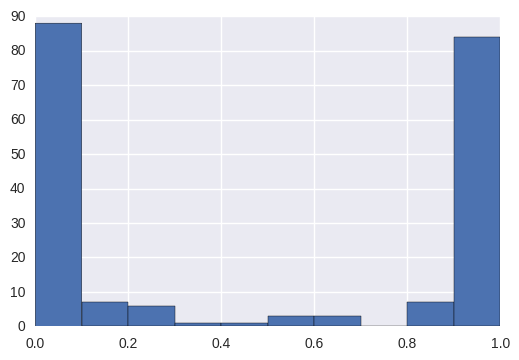

In [20]:
plt.hist(proba)